In [2]:
# pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install xlrd>=1.0.0

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [13]:
url = "https://www.transtats.bts.gov/AverageFare"

In [15]:
avg_oil = pd.read_excel("fredgraph.xls")
avg_oil

,observation_date,DCOILWTICO_CPIAUCSL_NBD20130701
0,1990-01-01,35.949101
1,1991-01-01,36.943028
2,1992-01-01,33.669480
3,1993-01-01,32.208954
4,1994-01-01,25.942617
5,1995-01-01,29.098338
6,1996-01-01,31.115101
7,1997-01-01,31.221493
8,1998-01-01,22.009889
9,1999-01-01,21.839881


In [16]:
new_columns = {'observation_date':'Year','DCOILWTICO_CPIAUCSL_NBD20130701':'U.S. Crude Oil (USD/Barrel)'}
avg_oil.rename(columns=new_columns, inplace=True)

In [17]:
avg_oil.head()

,Year,U.S. Crude Oil (USD/Barrel)
0,1990-01-01,35.949101
1,1991-01-01,36.943028
2,1992-01-01,33.669480
3,1993-01-01,32.208954
4,1994-01-01,25.942617


In [18]:
avg_oil['U.S. Crude Oil (USD/Barrel)'] = avg_oil['U.S. Crude Oil (USD/Barrel)'].round(2)
avg_oil.head()

,Year,U.S. Crude Oil (USD/Barrel)
0,1990-01-01,35.95
1,1991-01-01,36.94
2,1992-01-01,33.67
3,1993-01-01,32.21
4,1994-01-01,25.94


In [19]:
# avg_oil.drop(avg_oil.tail(1).index,inplace=True)

In [20]:
avg_oil.head()

,Year,U.S. Crude Oil (USD/Barrel)
0,1990-01-01,35.95
1,1991-01-01,36.94
2,1992-01-01,33.67
3,1993-01-01,32.21
4,1994-01-01,25.94


In [21]:
avg_oil.to_csv('oil_prices.csv', index=False)

In [24]:
avg_fare_2022 = pd.read_csv("AverageFare_Annual_2022.csv", sep=';')
avg_fare_2022
# national avg $378.12

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1.0,LAX,Los Angeles International,Los Angeles,CA,416.64,432.63,"1,204,082"
1,2.0,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,373.01,387.32,"998,248"
2,3.0,DEN,Denver International,Denver,CO,341.22,354.31,"990,155"
3,4.0,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,393.80,408.91,"951,353"
4,5.0,EWR,Newark Liberty International,Newark,NJ,403.22,418.69,"844,385"
...,...,...,...,...,...,...,...,...
443,441.0,HNH,Hoonah Airport,Hoonah,AK,354.00,367.58,1
444,441.0,HNS,Haines Airport,Haines,AK,314.00,326.05,1
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
avg_fare_2019 = pd.read_csv("AverageFare_Annual_2019.csv", sep=';')
avg_fare_2019

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,356.56,423.82,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,344.89,409.95,"998,248"
2,3,DEN,Denver International,Denver,CO,300.48,357.17,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,370.49,440.37,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,407.21,484.02,"844,385"
...,...,...,...,...,...,...,...,...
434,428,FKL,Venango Regional,Franklin/Oil City,PA,383.40,455.72,-
435,428,BFM,Mobile International,Mobile,AL,114.38,135.95,-
436,428,CYF,Chefornak Airport,Chefornak,AK,742.00,881.97,-
437,428,GAL,Edward G. Pitka Sr.,Galena,AK,681.00,809.46,-


In [38]:
year = 2019
avg_fare_2019['Year'] = year
avg_fare_2019

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,356.56,423.82,"1,204,082",2019
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,344.89,409.95,"998,248",2019
2,3,DEN,Denver International,Denver,CO,300.48,357.17,"990,155",2019
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,370.49,440.37,"951,353",2019
4,5,EWR,Newark Liberty International,Newark,NJ,407.21,484.02,"844,385",2019
...,...,...,...,...,...,...,...,...,...
434,428,FKL,Venango Regional,Franklin/Oil City,PA,383.40,455.72,-,2019
435,428,BFM,Mobile International,Mobile,AL,114.38,135.95,-,2019
436,428,CYF,Chefornak Airport,Chefornak,AK,742.00,881.97,-,2019
437,428,GAL,Edward G. Pitka Sr.,Galena,AK,681.00,809.46,-,2019


In [39]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2019.rename(columns=new_columns, inplace=True)

In [41]:
avg_fare_2019 = avg_fare_2019.drop('2022 Passengers (10% sample)', axis=1)

In [42]:
avg_fare_2019

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,356.56,423.82,2019
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,344.89,409.95,2019
2,3,DEN,Denver International,Denver,CO,300.48,357.17,2019
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,370.49,440.37,2019
4,5,EWR,Newark Liberty International,Newark,NJ,407.21,484.02,2019
...,...,...,...,...,...,...,...,...
434,428,FKL,Venango Regional,Franklin/Oil City,PA,383.40,455.72,2019
435,428,BFM,Mobile International,Mobile,AL,114.38,135.95,2019
436,428,CYF,Chefornak Airport,Chefornak,AK,742.00,881.97,2019
437,428,GAL,Edward G. Pitka Sr.,Galena,AK,681.00,809.46,2019


In [43]:
avg_fare_2019.to_csv('avgfare2019.csv', index=False)

In [44]:
avg_fare_1999 = pd.read_csv("AverageFare_Annual_1999.csv", sep=';')
avg_fare_1999

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,334.70,610.60,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,393.16,717.24,"998,248"
2,3,DEN,Denver International,Denver,CO,413.66,754.64,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,327.93,598.25,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,419.62,765.51,"844,385"
...,...,...,...,...,...,...,...,...
629,419,WTK,Noatak Airport,Noatak,AK,597.17,1089.41,-
630,419,WTL,Tuntutuliak Airport,Tuntutuliak,AK,347.67,634.25,-
631,419,WWT,Mertarvik,Newtok,AK,429.53,783.59,-
632,419,YKN,Chan Gurney Municipal,Yankton,SD,395.50,721.51,-


In [45]:
year = 1999
avg_fare_1999['Year'] = year
avg_fare_1999

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,334.70,610.60,"1,204,082",1999
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,393.16,717.24,"998,248",1999
2,3,DEN,Denver International,Denver,CO,413.66,754.64,"990,155",1999
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,327.93,598.25,"951,353",1999
4,5,EWR,Newark Liberty International,Newark,NJ,419.62,765.51,"844,385",1999
...,...,...,...,...,...,...,...,...,...
629,419,WTK,Noatak Airport,Noatak,AK,597.17,1089.41,-,1999
630,419,WTL,Tuntutuliak Airport,Tuntutuliak,AK,347.67,634.25,-,1999
631,419,WWT,Mertarvik,Newtok,AK,429.53,783.59,-,1999
632,419,YKN,Chan Gurney Municipal,Yankton,SD,395.50,721.51,-,1999


In [46]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_1999.rename(columns=new_columns, inplace=True)

In [47]:
avg_fare_1999 = avg_fare_1999.drop('2022 Passengers (10% sample)', axis=1)

In [48]:
avg_fare_1999

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,334.70,610.60,1999
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,393.16,717.24,1999
2,3,DEN,Denver International,Denver,CO,413.66,754.64,1999
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,327.93,598.25,1999
4,5,EWR,Newark Liberty International,Newark,NJ,419.62,765.51,1999
...,...,...,...,...,...,...,...,...
629,419,WTK,Noatak Airport,Noatak,AK,597.17,1089.41,1999
630,419,WTL,Tuntutuliak Airport,Tuntutuliak,AK,347.67,634.25,1999
631,419,WWT,Mertarvik,Newtok,AK,429.53,783.59,1999
632,419,YKN,Chan Gurney Municipal,Yankton,SD,395.50,721.51,1999


In [49]:
avg_fare_1999.to_csv('avgfare1999.csv', index=False)

In [51]:
avg_fare_2000 = pd.read_csv("AverageFare_Annual_2000.csv", sep=';')
avg_fare_2000

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,352.99,622.92,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,409.26,722.23,"998,248"
2,3,DEN,Denver International,Denver,CO,434.58,766.91,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,339.23,598.64,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,449.52,793.27,"844,385"
...,...,...,...,...,...,...,...,...
609,419,WTK,Noatak Airport,Noatak,AK,689.40,1216.59,-
610,419,WTL,Tuntutuliak Airport,Tuntutuliak,AK,445.43,786.05,-
611,419,WWT,Mertarvik,Newtok,AK,393.50,694.41,-
612,419,YKN,Chan Gurney Municipal,Yankton,SD,381.35,672.97,-


In [52]:
year = 2000
avg_fare_2000['Year'] = year
avg_fare_2000

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,352.99,622.92,"1,204,082",2000
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,409.26,722.23,"998,248",2000
2,3,DEN,Denver International,Denver,CO,434.58,766.91,"990,155",2000
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,339.23,598.64,"951,353",2000
4,5,EWR,Newark Liberty International,Newark,NJ,449.52,793.27,"844,385",2000
...,...,...,...,...,...,...,...,...,...
609,419,WTK,Noatak Airport,Noatak,AK,689.40,1216.59,-,2000
610,419,WTL,Tuntutuliak Airport,Tuntutuliak,AK,445.43,786.05,-,2000
611,419,WWT,Mertarvik,Newtok,AK,393.50,694.41,-,2000
612,419,YKN,Chan Gurney Municipal,Yankton,SD,381.35,672.97,-,2000


In [53]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2000.rename(columns=new_columns, inplace=True)

In [54]:
avg_fare_2000 = avg_fare_2000.drop('2022 Passengers (10% sample)', axis=1)

In [55]:
avg_fare_2000

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,352.99,622.92,2000
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,409.26,722.23,2000
2,3,DEN,Denver International,Denver,CO,434.58,766.91,2000
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,339.23,598.64,2000
4,5,EWR,Newark Liberty International,Newark,NJ,449.52,793.27,2000
...,...,...,...,...,...,...,...,...
609,419,WTK,Noatak Airport,Noatak,AK,689.40,1216.59,2000
610,419,WTL,Tuntutuliak Airport,Tuntutuliak,AK,445.43,786.05,2000
611,419,WWT,Mertarvik,Newtok,AK,393.50,694.41,2000
612,419,YKN,Chan Gurney Municipal,Yankton,SD,381.35,672.97,2000


In [56]:
avg_fare_2000.to_csv('avgfare2000.csv', index=False)

In [57]:
avg_fare_2001 = pd.read_csv("AverageFare_Annual_2001.csv", sep=';')
avg_fare_2001

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,336.82,578.06,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,374.32,642.40,"998,248"
2,3,DEN,Denver International,Denver,CO,412.28,707.55,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,328.77,564.24,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,421.09,722.67,"844,385"
...,...,...,...,...,...,...,...,...
595,423,WTK,Noatak Airport,Noatak,AK,696.33,1195.05,-
596,423,WTL,Tuntutuliak Airport,Tuntutuliak,AK,488.67,838.65,-
597,423,WWT,Mertarvik,Newtok,AK,400.20,686.83,-
598,423,YKN,Chan Gurney Municipal,Yankton,SD,598.33,1026.87,-


In [58]:
year = 2001
avg_fare_2001['Year'] = year
avg_fare_2001

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,336.82,578.06,"1,204,082",2001
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,374.32,642.40,"998,248",2001
2,3,DEN,Denver International,Denver,CO,412.28,707.55,"990,155",2001
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,328.77,564.24,"951,353",2001
4,5,EWR,Newark Liberty International,Newark,NJ,421.09,722.67,"844,385",2001
...,...,...,...,...,...,...,...,...,...
595,423,WTK,Noatak Airport,Noatak,AK,696.33,1195.05,-,2001
596,423,WTL,Tuntutuliak Airport,Tuntutuliak,AK,488.67,838.65,-,2001
597,423,WWT,Mertarvik,Newtok,AK,400.20,686.83,-,2001
598,423,YKN,Chan Gurney Municipal,Yankton,SD,598.33,1026.87,-,2001


In [59]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2001.rename(columns=new_columns, inplace=True)

In [60]:
avg_fare_2001 = avg_fare_2001.drop('2022 Passengers (10% sample)', axis=1)

In [61]:
avg_fare_2001

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,336.82,578.06,2001
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,374.32,642.40,2001
2,3,DEN,Denver International,Denver,CO,412.28,707.55,2001
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,328.77,564.24,2001
4,5,EWR,Newark Liberty International,Newark,NJ,421.09,722.67,2001
...,...,...,...,...,...,...,...,...
595,423,WTK,Noatak Airport,Noatak,AK,696.33,1195.05,2001
596,423,WTL,Tuntutuliak Airport,Tuntutuliak,AK,488.67,838.65,2001
597,423,WWT,Mertarvik,Newtok,AK,400.20,686.83,2001
598,423,YKN,Chan Gurney Municipal,Yankton,SD,598.33,1026.87,2001


In [62]:
avg_fare_2001.to_csv('avgfare2001.csv', index=False)

In [63]:
avg_fare_2002 = pd.read_csv("AverageFare_Annual_2002.csv", sep=';')
avg_fare_2002

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,342.60,578.79,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,338.23,571.40,"998,248"
2,3,DEN,Denver International,Denver,CO,366.38,618.97,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,305.63,516.34,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,399.04,674.14,"844,385"
...,...,...,...,...,...,...,...,...
564,421,WSN,South Naknek 2,South Naknek,AK,445.00,751.79,-
565,421,WTK,Noatak Airport,Noatak,AK,671.33,1134.16,-
566,421,WTL,Tuntutuliak Airport,Tuntutuliak,AK,471.25,796.14,-
567,421,WWT,Mertarvik,Newtok,AK,435.20,735.23,-


In [64]:
year = 2002
avg_fare_2002['Year'] = year
avg_fare_2002

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,342.60,578.79,"1,204,082",2002
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,338.23,571.40,"998,248",2002
2,3,DEN,Denver International,Denver,CO,366.38,618.97,"990,155",2002
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,305.63,516.34,"951,353",2002
4,5,EWR,Newark Liberty International,Newark,NJ,399.04,674.14,"844,385",2002
...,...,...,...,...,...,...,...,...,...
564,421,WSN,South Naknek 2,South Naknek,AK,445.00,751.79,-,2002
565,421,WTK,Noatak Airport,Noatak,AK,671.33,1134.16,-,2002
566,421,WTL,Tuntutuliak Airport,Tuntutuliak,AK,471.25,796.14,-,2002
567,421,WWT,Mertarvik,Newtok,AK,435.20,735.23,-,2002


In [65]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2002.rename(columns=new_columns, inplace=True)

In [66]:
avg_fare_2002 = avg_fare_2002.drop('2022 Passengers (10% sample)', axis=1)

In [67]:
avg_fare_2002

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,342.60,578.79,2002
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,338.23,571.40,2002
2,3,DEN,Denver International,Denver,CO,366.38,618.97,2002
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,305.63,516.34,2002
4,5,EWR,Newark Liberty International,Newark,NJ,399.04,674.14,2002
...,...,...,...,...,...,...,...,...
564,421,WSN,South Naknek 2,South Naknek,AK,445.00,751.79,2002
565,421,WTK,Noatak Airport,Noatak,AK,671.33,1134.16,2002
566,421,WTL,Tuntutuliak Airport,Tuntutuliak,AK,471.25,796.14,2002
567,421,WWT,Mertarvik,Newtok,AK,435.20,735.23,2002


In [68]:
avg_fare_2002.to_csv('avgfare2002.csv', index=False)

In [69]:
avg_fare_2003 = pd.read_csv("AverageFare_Annual_2003.csv", sep=';')
avg_fare_2003

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,338.08,558.47,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,339.96,561.59,"998,248"
2,3,DEN,Denver International,Denver,CO,341.96,564.90,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,304.49,502.99,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,407.35,672.91,"844,385"
...,...,...,...,...,...,...,...,...
554,422,WRL,Worland Municipal,Worland,WY,616.10,1017.74,-
555,422,WSN,South Naknek 2,South Naknek,AK,493.00,814.39,-
556,422,WTK,Noatak Airport,Noatak,AK,1035.00,1709.73,-
557,422,WTL,Tuntutuliak Airport,Tuntutuliak,AK,583.80,964.39,-


In [70]:
year = 2003
avg_fare_2003['Year'] = year
avg_fare_2003

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,338.08,558.47,"1,204,082",2003
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,339.96,561.59,"998,248",2003
2,3,DEN,Denver International,Denver,CO,341.96,564.90,"990,155",2003
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,304.49,502.99,"951,353",2003
4,5,EWR,Newark Liberty International,Newark,NJ,407.35,672.91,"844,385",2003
...,...,...,...,...,...,...,...,...,...
554,422,WRL,Worland Municipal,Worland,WY,616.10,1017.74,-,2003
555,422,WSN,South Naknek 2,South Naknek,AK,493.00,814.39,-,2003
556,422,WTK,Noatak Airport,Noatak,AK,1035.00,1709.73,-,2003
557,422,WTL,Tuntutuliak Airport,Tuntutuliak,AK,583.80,964.39,-,2003


In [71]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2003.rename(columns=new_columns, inplace=True)

In [72]:
avg_fare_2003 = avg_fare_2003.drop('2022 Passengers (10% sample)', axis=1)

In [73]:
avg_fare_2003

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,338.08,558.47,2003
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,339.96,561.59,2003
2,3,DEN,Denver International,Denver,CO,341.96,564.90,2003
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,304.49,502.99,2003
4,5,EWR,Newark Liberty International,Newark,NJ,407.35,672.91,2003
...,...,...,...,...,...,...,...,...
554,422,WRL,Worland Municipal,Worland,WY,616.10,1017.74,2003
555,422,WSN,South Naknek 2,South Naknek,AK,493.00,814.39,2003
556,422,WTK,Noatak Airport,Noatak,AK,1035.00,1709.73,2003
557,422,WTL,Tuntutuliak Airport,Tuntutuliak,AK,583.80,964.39,2003


In [74]:
avg_fare_2003.to_csv('avgfare2003.csv', index=False)

In [75]:
avg_fare_2004 = pd.read_csv("AverageFare_Annual_2004.csv", sep=';')
avg_fare_2004

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,319.71,514.36,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,320.58,515.76,"998,248"
2,3,DEN,Denver International,Denver,CO,325.26,523.29,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,294.35,473.56,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,389.71,626.98,"844,385"
...,...,...,...,...,...,...,...,...
512,420,WAS,Washington DC Metropolitan Area,Washington,DC,175.50,282.35,-
513,420,WDG,Enid Woodring Regional,Enid,OK,837.00,1346.60,-
514,420,WLK,Selawik Airport,Selawik,AK,677.00,1089.19,-
515,420,WRL,Worland Municipal,Worland,WY,641.90,1032.72,-


In [76]:
year = 2004
avg_fare_2004['Year'] = year
avg_fare_2004

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,319.71,514.36,"1,204,082",2004
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,320.58,515.76,"998,248",2004
2,3,DEN,Denver International,Denver,CO,325.26,523.29,"990,155",2004
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,294.35,473.56,"951,353",2004
4,5,EWR,Newark Liberty International,Newark,NJ,389.71,626.98,"844,385",2004
...,...,...,...,...,...,...,...,...,...
512,420,WAS,Washington DC Metropolitan Area,Washington,DC,175.50,282.35,-,2004
513,420,WDG,Enid Woodring Regional,Enid,OK,837.00,1346.60,-,2004
514,420,WLK,Selawik Airport,Selawik,AK,677.00,1089.19,-,2004
515,420,WRL,Worland Municipal,Worland,WY,641.90,1032.72,-,2004


In [77]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2004.rename(columns=new_columns, inplace=True)

In [78]:
avg_fare_2004 = avg_fare_2004.drop('2022 Passengers (10% sample)', axis=1)

In [79]:
avg_fare_2004

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,319.71,514.36,2004
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,320.58,515.76,2004
2,3,DEN,Denver International,Denver,CO,325.26,523.29,2004
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,294.35,473.56,2004
4,5,EWR,Newark Liberty International,Newark,NJ,389.71,626.98,2004
...,...,...,...,...,...,...,...,...
512,420,WAS,Washington DC Metropolitan Area,Washington,DC,175.50,282.35,2004
513,420,WDG,Enid Woodring Regional,Enid,OK,837.00,1346.60,2004
514,420,WLK,Selawik Airport,Selawik,AK,677.00,1089.19,2004
515,420,WRL,Worland Municipal,Worland,WY,641.90,1032.72,2004


In [80]:
avg_fare_2004.to_csv('avgfare2004.csv', index=False)

In [81]:
avg_fare_2005 = pd.read_csv("AverageFare_Annual_2005.csv", sep=';')
avg_fare_2005

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,339.33,528.01,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,313.59,487.97,"998,248"
2,3,DEN,Denver International,Denver,CO,340.28,529.49,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,312.56,486.36,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,385.84,600.39,"844,385"
...,...,...,...,...,...,...,...,...
486,421,WBB,Stebbins Airport,Stebbins,AK,1352.00,2103.78,-
487,421,WDG,Enid Woodring Regional,Enid,OK,586.00,911.84,-
488,421,WRL,Worland Municipal,Worland,WY,597.04,929.03,-
489,421,WTL,Tuntutuliak Airport,Tuntutuliak,AK,483.00,751.57,-


In [82]:
year = 2005
avg_fare_2005['Year'] = year
avg_fare_2005

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,339.33,528.01,"1,204,082",2005
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,313.59,487.97,"998,248",2005
2,3,DEN,Denver International,Denver,CO,340.28,529.49,"990,155",2005
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,312.56,486.36,"951,353",2005
4,5,EWR,Newark Liberty International,Newark,NJ,385.84,600.39,"844,385",2005
...,...,...,...,...,...,...,...,...,...
486,421,WBB,Stebbins Airport,Stebbins,AK,1352.00,2103.78,-,2005
487,421,WDG,Enid Woodring Regional,Enid,OK,586.00,911.84,-,2005
488,421,WRL,Worland Municipal,Worland,WY,597.04,929.03,-,2005
489,421,WTL,Tuntutuliak Airport,Tuntutuliak,AK,483.00,751.57,-,2005


In [83]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2005.rename(columns=new_columns, inplace=True)

In [84]:
avg_fare_2005 = avg_fare_2005.drop('2022 Passengers (10% sample)', axis=1)

In [85]:
avg_fare_2005

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,339.33,528.01,2005
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,313.59,487.97,2005
2,3,DEN,Denver International,Denver,CO,340.28,529.49,2005
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,312.56,486.36,2005
4,5,EWR,Newark Liberty International,Newark,NJ,385.84,600.39,2005
...,...,...,...,...,...,...,...,...
486,421,WBB,Stebbins Airport,Stebbins,AK,1352.00,2103.78,2005
487,421,WDG,Enid Woodring Regional,Enid,OK,586.00,911.84,2005
488,421,WRL,Worland Municipal,Worland,WY,597.04,929.03,2005
489,421,WTL,Tuntutuliak Airport,Tuntutuliak,AK,483.00,751.57,2005


In [86]:
avg_fare_2005.to_csv('avgfare2005.csv', index=False)

In [87]:
avg_fare_2006 = pd.read_csv("AverageFare_Annual_2006.csv", sep=';')
avg_fare_2006

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,360.48,543.40,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,330.82,498.69,"998,248"
2,3,DEN,Denver International,Denver,CO,324.20,488.71,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.75,528.73,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,379.69,572.35,"844,385"
...,...,...,...,...,...,...,...,...
470,424,VIS,Visalia Municipal,Visalia,CA,525.33,791.90,-
471,424,WAS,Washington DC Metropolitan Area,Washington,DC,427.50,644.42,-
472,424,WDG,Enid Woodring Regional,Enid,OK,713.14,1075.01,-
473,424,WRL,Worland Municipal,Worland,WY,539.22,812.83,-


In [88]:
year = 2006
avg_fare_2006['Year'] = year
avg_fare_2006

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,360.48,543.40,"1,204,082",2006
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,330.82,498.69,"998,248",2006
2,3,DEN,Denver International,Denver,CO,324.20,488.71,"990,155",2006
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.75,528.73,"951,353",2006
4,5,EWR,Newark Liberty International,Newark,NJ,379.69,572.35,"844,385",2006
...,...,...,...,...,...,...,...,...,...
470,424,VIS,Visalia Municipal,Visalia,CA,525.33,791.90,-,2006
471,424,WAS,Washington DC Metropolitan Area,Washington,DC,427.50,644.42,-,2006
472,424,WDG,Enid Woodring Regional,Enid,OK,713.14,1075.01,-,2006
473,424,WRL,Worland Municipal,Worland,WY,539.22,812.83,-,2006


In [89]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2006.rename(columns=new_columns, inplace=True)

In [90]:
avg_fare_2006 = avg_fare_2006.drop('2022 Passengers (10% sample)', axis=1)

In [91]:
avg_fare_2006

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,360.48,543.40,2006
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,330.82,498.69,2006
2,3,DEN,Denver International,Denver,CO,324.20,488.71,2006
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.75,528.73,2006
4,5,EWR,Newark Liberty International,Newark,NJ,379.69,572.35,2006
...,...,...,...,...,...,...,...,...
470,424,VIS,Visalia Municipal,Visalia,CA,525.33,791.90,2006
471,424,WAS,Washington DC Metropolitan Area,Washington,DC,427.50,644.42,2006
472,424,WDG,Enid Woodring Regional,Enid,OK,713.14,1075.01,2006
473,424,WRL,Worland Municipal,Worland,WY,539.22,812.83,2006


In [92]:
avg_fare_2006.to_csv('avgfare2006.csv', index=False)

In [93]:
avg_fare_2007 = pd.read_csv("AverageFare_Annual_2007.csv", sep=';')
avg_fare_2007

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,370.01,542.29,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,326.17,478.04,"998,248"
2,3,DEN,Denver International,Denver,CO,316.79,464.29,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,357.78,524.37,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,379.98,556.90,"844,385"
...,...,...,...,...,...,...,...,...
467,425,UNK,Unalakleet Airport,Unalakleet,AK,689.00,1009.81,-
468,425,UST,Northeast Florida Regional,St. Augustine,FL,152.33,223.25,-
469,425,VIS,Visalia Municipal,Visalia,CA,456.96,669.72,-
470,425,WRL,Worland Municipal,Worland,WY,612.93,898.32,-


In [94]:
year = 2007
avg_fare_2007['Year'] = year
avg_fare_2007

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,370.01,542.29,"1,204,082",2007
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,326.17,478.04,"998,248",2007
2,3,DEN,Denver International,Denver,CO,316.79,464.29,"990,155",2007
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,357.78,524.37,"951,353",2007
4,5,EWR,Newark Liberty International,Newark,NJ,379.98,556.90,"844,385",2007
...,...,...,...,...,...,...,...,...,...
467,425,UNK,Unalakleet Airport,Unalakleet,AK,689.00,1009.81,-,2007
468,425,UST,Northeast Florida Regional,St. Augustine,FL,152.33,223.25,-,2007
469,425,VIS,Visalia Municipal,Visalia,CA,456.96,669.72,-,2007
470,425,WRL,Worland Municipal,Worland,WY,612.93,898.32,-,2007


In [95]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2007.rename(columns=new_columns, inplace=True)

In [96]:
avg_fare_2007 = avg_fare_2007.drop('2022 Passengers (10% sample)', axis=1)

In [97]:
avg_fare_2007

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,370.01,542.29,2007
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,326.17,478.04,2007
2,3,DEN,Denver International,Denver,CO,316.79,464.29,2007
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,357.78,524.37,2007
4,5,EWR,Newark Liberty International,Newark,NJ,379.98,556.90,2007
...,...,...,...,...,...,...,...,...
467,425,UNK,Unalakleet Airport,Unalakleet,AK,689.00,1009.81,2007
468,425,UST,Northeast Florida Regional,St. Augustine,FL,152.33,223.25,2007
469,425,VIS,Visalia Municipal,Visalia,CA,456.96,669.72,2007
470,425,WRL,Worland Municipal,Worland,WY,612.93,898.32,2007


In [98]:
avg_fare_2007.to_csv('avgfare2007.csv', index=False)

In [99]:
avg_fare_2008 = pd.read_csv("AverageFare_Annual_2008.csv", sep=';')
avg_fare_2008

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,389.39,549.59,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,361.46,510.18,"998,248"
2,3,DEN,Denver International,Denver,CO,325.86,459.93,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,351.23,495.74,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,428.99,605.48,"844,385"
...,...,...,...,...,...,...,...,...
455,418,TSS,East 34th Street Heliport,New York,NY,1008.14,1422.92,-
456,418,UNK,Unalakleet Airport,Unalakleet,AK,676.40,954.69,-
457,418,VIS,Visalia Municipal,Visalia,CA,498.54,703.65,-
458,418,WRL,Worland Municipal,Worland,WY,563.45,795.27,-


In [100]:
year = 2008
avg_fare_2008['Year'] = year
avg_fare_2008

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,389.39,549.59,"1,204,082",2008
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,361.46,510.18,"998,248",2008
2,3,DEN,Denver International,Denver,CO,325.86,459.93,"990,155",2008
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,351.23,495.74,"951,353",2008
4,5,EWR,Newark Liberty International,Newark,NJ,428.99,605.48,"844,385",2008
...,...,...,...,...,...,...,...,...,...
455,418,TSS,East 34th Street Heliport,New York,NY,1008.14,1422.92,-,2008
456,418,UNK,Unalakleet Airport,Unalakleet,AK,676.40,954.69,-,2008
457,418,VIS,Visalia Municipal,Visalia,CA,498.54,703.65,-,2008
458,418,WRL,Worland Municipal,Worland,WY,563.45,795.27,-,2008


In [101]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2008.rename(columns=new_columns, inplace=True)

In [102]:
avg_fare_2008 = avg_fare_2008.drop('2022 Passengers (10% sample)', axis=1)

In [103]:
avg_fare_2008

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,389.39,549.59,2008
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,361.46,510.18,2008
2,3,DEN,Denver International,Denver,CO,325.86,459.93,2008
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,351.23,495.74,2008
4,5,EWR,Newark Liberty International,Newark,NJ,428.99,605.48,2008
...,...,...,...,...,...,...,...,...
455,418,TSS,East 34th Street Heliport,New York,NY,1008.14,1422.92,2008
456,418,UNK,Unalakleet Airport,Unalakleet,AK,676.40,954.69,2008
457,418,VIS,Visalia Municipal,Visalia,CA,498.54,703.65,2008
458,418,WRL,Worland Municipal,Worland,WY,563.45,795.27,2008


In [104]:
avg_fare_2008.to_csv('avgfare2008.csv', index=False)

In [105]:
avg_fare_2009 = pd.read_csv("AverageFare_Annual_2009.csv", sep=';')
avg_fare_2009

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,343.06,485.93,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,328.70,465.59,"998,248"
2,3,DEN,Denver International,Denver,CO,285.46,404.34,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,314.81,445.91,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,385.01,545.36,"844,385"
...,...,...,...,...,...,...,...,...
452,419,TSS,East 34th Street Heliport,New York,NY,333.00,471.68,-
453,419,UNK,Unalakleet Airport,Unalakleet,AK,1509.00,2137.44,-
454,419,VIS,Visalia Municipal,Visalia,CA,481.88,682.56,-
455,419,WRL,Worland Municipal,Worland,WY,574.57,813.86,-


In [106]:
year = 2009
avg_fare_2009['Year'] = year
avg_fare_2009

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,343.06,485.93,"1,204,082",2009
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,328.70,465.59,"998,248",2009
2,3,DEN,Denver International,Denver,CO,285.46,404.34,"990,155",2009
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,314.81,445.91,"951,353",2009
4,5,EWR,Newark Liberty International,Newark,NJ,385.01,545.36,"844,385",2009
...,...,...,...,...,...,...,...,...,...
452,419,TSS,East 34th Street Heliport,New York,NY,333.00,471.68,-,2009
453,419,UNK,Unalakleet Airport,Unalakleet,AK,1509.00,2137.44,-,2009
454,419,VIS,Visalia Municipal,Visalia,CA,481.88,682.56,-,2009
455,419,WRL,Worland Municipal,Worland,WY,574.57,813.86,-,2009


In [107]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2009.rename(columns=new_columns, inplace=True)

In [108]:
avg_fare_2009 = avg_fare_2009.drop('2022 Passengers (10% sample)', axis=1)

In [109]:
avg_fare_2009

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,343.06,485.93,2009
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,328.70,465.59,2009
2,3,DEN,Denver International,Denver,CO,285.46,404.34,2009
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,314.81,445.91,2009
4,5,EWR,Newark Liberty International,Newark,NJ,385.01,545.36,2009
...,...,...,...,...,...,...,...,...
452,419,TSS,East 34th Street Heliport,New York,NY,333.00,471.68,2009
453,419,UNK,Unalakleet Airport,Unalakleet,AK,1509.00,2137.44,2009
454,419,VIS,Visalia Municipal,Visalia,CA,481.88,682.56,2009
455,419,WRL,Worland Municipal,Worland,WY,574.57,813.86,2009


In [110]:
avg_fare_2009.to_csv('avgfare2009.csv', index=False)

In [111]:
avg_fare_2010 = pd.read_csv("AverageFare_Annual_2010.csv", sep=';')
avg_fare_2010

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,369.76,515.31,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,355.73,495.75,"998,248"
2,3,DEN,Denver International,Denver,CO,295.79,412.21,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,334.76,466.52,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,450.02,627.15,"844,385"
...,...,...,...,...,...,...,...,...
452,418,UTM,Tunica Municipal,Tunica,MS,217.48,303.08,-
453,418,VAK,Chevak Airport,Chevak,AK,594.67,828.73,-
454,418,VIS,Visalia Municipal,Visalia,CA,446.57,622.34,-
455,418,WRL,Worland Municipal,Worland,WY,609.49,849.39,-


In [112]:
year = 2010
avg_fare_2010['Year'] = year
avg_fare_2010

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,369.76,515.31,"1,204,082",2010
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,355.73,495.75,"998,248",2010
2,3,DEN,Denver International,Denver,CO,295.79,412.21,"990,155",2010
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,334.76,466.52,"951,353",2010
4,5,EWR,Newark Liberty International,Newark,NJ,450.02,627.15,"844,385",2010
...,...,...,...,...,...,...,...,...,...
452,418,UTM,Tunica Municipal,Tunica,MS,217.48,303.08,-,2010
453,418,VAK,Chevak Airport,Chevak,AK,594.67,828.73,-,2010
454,418,VIS,Visalia Municipal,Visalia,CA,446.57,622.34,-,2010
455,418,WRL,Worland Municipal,Worland,WY,609.49,849.39,-,2010


In [113]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2010.rename(columns=new_columns, inplace=True)

In [114]:
avg_fare_2010 = avg_fare_2010.drop('2022 Passengers (10% sample)', axis=1)

In [115]:
avg_fare_2010

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,369.76,515.31,2010
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,355.73,495.75,2010
2,3,DEN,Denver International,Denver,CO,295.79,412.21,2010
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,334.76,466.52,2010
4,5,EWR,Newark Liberty International,Newark,NJ,450.02,627.15,2010
...,...,...,...,...,...,...,...,...
452,418,UTM,Tunica Municipal,Tunica,MS,217.48,303.08,2010
453,418,VAK,Chevak Airport,Chevak,AK,594.67,828.73,2010
454,418,VIS,Visalia Municipal,Visalia,CA,446.57,622.34,2010
455,418,WRL,Worland Municipal,Worland,WY,609.49,849.39,2010


In [116]:
avg_fare_2010.to_csv('avgfare2010.csv', index=False)

In [117]:
avg_fare_2011 = pd.read_csv("AverageFare_Annual_2011.csv", sep=';')
avg_fare_2011

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,394.88,533.47,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,378.78,511.71,"998,248"
2,3,DEN,Denver International,Denver,CO,319.57,431.72,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,368.74,498.15,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,469.86,634.76,"844,385"
...,...,...,...,...,...,...,...,...
448,423,UNK,Unalakleet Airport,Unalakleet,AK,1017.38,1374.43,-
449,423,UTM,Tunica Municipal,Tunica,MS,235.28,317.85,-
450,423,VIS,Visalia Municipal,Visalia,CA,493.07,666.12,-
451,423,WRL,Worland Municipal,Worland,WY,550.18,743.27,-


In [118]:
year = 2011
avg_fare_2011['Year'] = year
avg_fare_2011

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,394.88,533.47,"1,204,082",2011
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,378.78,511.71,"998,248",2011
2,3,DEN,Denver International,Denver,CO,319.57,431.72,"990,155",2011
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,368.74,498.15,"951,353",2011
4,5,EWR,Newark Liberty International,Newark,NJ,469.86,634.76,"844,385",2011
...,...,...,...,...,...,...,...,...,...
448,423,UNK,Unalakleet Airport,Unalakleet,AK,1017.38,1374.43,-,2011
449,423,UTM,Tunica Municipal,Tunica,MS,235.28,317.85,-,2011
450,423,VIS,Visalia Municipal,Visalia,CA,493.07,666.12,-,2011
451,423,WRL,Worland Municipal,Worland,WY,550.18,743.27,-,2011


In [119]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2011.rename(columns=new_columns, inplace=True)

In [120]:
avg_fare_2011 = avg_fare_2011.drop('2022 Passengers (10% sample)', axis=1)

In [121]:
avg_fare_2011

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,394.88,533.47,2011
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,378.78,511.71,2011
2,3,DEN,Denver International,Denver,CO,319.57,431.72,2011
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,368.74,498.15,2011
4,5,EWR,Newark Liberty International,Newark,NJ,469.86,634.76,2011
...,...,...,...,...,...,...,...,...
448,423,UNK,Unalakleet Airport,Unalakleet,AK,1017.38,1374.43,2011
449,423,UTM,Tunica Municipal,Tunica,MS,235.28,317.85,2011
450,423,VIS,Visalia Municipal,Visalia,CA,493.07,666.12,2011
451,423,WRL,Worland Municipal,Worland,WY,550.18,743.27,2011


In [122]:
avg_fare_2011.to_csv('avgfare2011.csv', index=False)

In [123]:
avg_fare_2012 = pd.read_csv("AverageFare_Annual_2012.csv", sep=';')
avg_fare_2012

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,401.84,531.87,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,385.05,509.64,"998,248"
2,3,DEN,Denver International,Denver,CO,320.91,424.74,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,365.82,484.19,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,477.06,631.42,"844,385"
...,...,...,...,...,...,...,...,...
455,425,SVC,Grant County,Silver City/Hurley,NM,579.44,766.93,-
456,425,VAK,Chevak Airport,Chevak,AK,786.00,1040.33,-
457,425,VIS,Visalia Municipal,Visalia,CA,481.90,637.83,-
458,425,WRL,Worland Municipal,Worland,WY,636.81,842.86,-


In [124]:
year = 2012
avg_fare_2012['Year'] = year
avg_fare_2012

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,401.84,531.87,"1,204,082",2012
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,385.05,509.64,"998,248",2012
2,3,DEN,Denver International,Denver,CO,320.91,424.74,"990,155",2012
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,365.82,484.19,"951,353",2012
4,5,EWR,Newark Liberty International,Newark,NJ,477.06,631.42,"844,385",2012
...,...,...,...,...,...,...,...,...,...
455,425,SVC,Grant County,Silver City/Hurley,NM,579.44,766.93,-,2012
456,425,VAK,Chevak Airport,Chevak,AK,786.00,1040.33,-,2012
457,425,VIS,Visalia Municipal,Visalia,CA,481.90,637.83,-,2012
458,425,WRL,Worland Municipal,Worland,WY,636.81,842.86,-,2012


In [125]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2012.rename(columns=new_columns, inplace=True)

In [126]:
avg_fare_2012 = avg_fare_2012.drop('2022 Passengers (10% sample)', axis=1)

In [127]:
avg_fare_2012

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,401.84,531.87,2012
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,385.05,509.64,2012
2,3,DEN,Denver International,Denver,CO,320.91,424.74,2012
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,365.82,484.19,2012
4,5,EWR,Newark Liberty International,Newark,NJ,477.06,631.42,2012
...,...,...,...,...,...,...,...,...
455,425,SVC,Grant County,Silver City/Hurley,NM,579.44,766.93,2012
456,425,VAK,Chevak Airport,Chevak,AK,786.00,1040.33,2012
457,425,VIS,Visalia Municipal,Visalia,CA,481.90,637.83,2012
458,425,WRL,Worland Municipal,Worland,WY,636.81,842.86,2012


In [128]:
avg_fare_2012.to_csv('avgfare2012.csv', index=False)

In [129]:
avg_fare_2013 = pd.read_csv("AverageFare_Annual_2013.csv", sep=';')
avg_fare_2013

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,411.92,537.34,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,400.51,522.46,"998,248"
2,3,DEN,Denver International,Denver,CO,327.21,426.83,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,397.86,518.99,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,487.50,635.92,"844,385"
...,...,...,...,...,...,...,...,...
447,425,SPB,Charlotte Amalie Harbor Seaplane Base,Charlotte Amalie,VI,274.00,357.42,-
448,425,SVC,Grant County,Silver City/Hurley,NM,518.62,676.52,-
449,425,VIS,Visalia Municipal,Visalia,CA,403.02,525.72,-
450,425,WRL,Worland Municipal,Worland,WY,619.58,808.22,-


In [130]:
year = 2013
avg_fare_2013['Year'] = year
avg_fare_2013

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,411.92,537.34,"1,204,082",2013
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,400.51,522.46,"998,248",2013
2,3,DEN,Denver International,Denver,CO,327.21,426.83,"990,155",2013
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,397.86,518.99,"951,353",2013
4,5,EWR,Newark Liberty International,Newark,NJ,487.50,635.92,"844,385",2013
...,...,...,...,...,...,...,...,...,...
447,425,SPB,Charlotte Amalie Harbor Seaplane Base,Charlotte Amalie,VI,274.00,357.42,-,2013
448,425,SVC,Grant County,Silver City/Hurley,NM,518.62,676.52,-,2013
449,425,VIS,Visalia Municipal,Visalia,CA,403.02,525.72,-,2013
450,425,WRL,Worland Municipal,Worland,WY,619.58,808.22,-,2013


In [131]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2013.rename(columns=new_columns, inplace=True)

In [132]:
avg_fare_2013 = avg_fare_2013.drop('2022 Passengers (10% sample)', axis=1)

In [133]:
avg_fare_2013

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,411.92,537.34,2013
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,400.51,522.46,2013
2,3,DEN,Denver International,Denver,CO,327.21,426.83,2013
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,397.86,518.99,2013
4,5,EWR,Newark Liberty International,Newark,NJ,487.50,635.92,2013
...,...,...,...,...,...,...,...,...
447,425,SPB,Charlotte Amalie Harbor Seaplane Base,Charlotte Amalie,VI,274.00,357.42,2013
448,425,SVC,Grant County,Silver City/Hurley,NM,518.62,676.52,2013
449,425,VIS,Visalia Municipal,Visalia,CA,403.02,525.72,2013
450,425,WRL,Worland Municipal,Worland,WY,619.58,808.22,2013


In [134]:
avg_fare_2013.to_csv('avgfare2013.csv', index=False)

In [135]:
avg_fare_2014 = pd.read_csv("AverageFare_Annual_2014.csv", sep=';')
avg_fare_2014

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,422.89,542.84,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,415.75,533.68,"998,248"
2,3,DEN,Denver International,Denver,CO,336.73,432.24,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,424.95,545.49,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,492.22,631.83,"844,385"
...,...,...,...,...,...,...,...,...
452,424,UNK,Unalakleet Airport,Unalakleet,AK,774.00,993.54,-
453,424,UST,Northeast Florida Regional,St. Augustine,FL,159.75,205.07,-
454,424,VIS,Visalia Municipal,Visalia,CA,479.56,615.58,-
455,424,WRL,Worland Municipal,Worland,WY,595.63,764.58,-


In [136]:
year = 2014
avg_fare_2014['Year'] = year
avg_fare_2014

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,422.89,542.84,"1,204,082",2014
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,415.75,533.68,"998,248",2014
2,3,DEN,Denver International,Denver,CO,336.73,432.24,"990,155",2014
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,424.95,545.49,"951,353",2014
4,5,EWR,Newark Liberty International,Newark,NJ,492.22,631.83,"844,385",2014
...,...,...,...,...,...,...,...,...,...
452,424,UNK,Unalakleet Airport,Unalakleet,AK,774.00,993.54,-,2014
453,424,UST,Northeast Florida Regional,St. Augustine,FL,159.75,205.07,-,2014
454,424,VIS,Visalia Municipal,Visalia,CA,479.56,615.58,-,2014
455,424,WRL,Worland Municipal,Worland,WY,595.63,764.58,-,2014


In [137]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2014.rename(columns=new_columns, inplace=True)

In [138]:
avg_fare_2014 = avg_fare_2014.drop('2022 Passengers (10% sample)', axis=1)

In [139]:
avg_fare_2014

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,422.89,542.84,2014
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,415.75,533.68,2014
2,3,DEN,Denver International,Denver,CO,336.73,432.24,2014
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,424.95,545.49,2014
4,5,EWR,Newark Liberty International,Newark,NJ,492.22,631.83,2014
...,...,...,...,...,...,...,...,...
452,424,UNK,Unalakleet Airport,Unalakleet,AK,774.00,993.54,2014
453,424,UST,Northeast Florida Regional,St. Augustine,FL,159.75,205.07,2014
454,424,VIS,Visalia Municipal,Visalia,CA,479.56,615.58,2014
455,424,WRL,Worland Municipal,Worland,WY,595.63,764.58,2014


In [140]:
avg_fare_2014.to_csv('avgfare2014.csv', index=False)

In [141]:
avg_fare_2015 = pd.read_csv("AverageFare_Annual_2015.csv", sep=';')
avg_fare_2015

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,398.62,511.08,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,359.19,460.52,"998,248"
2,3,DEN,Denver International,Denver,CO,326.65,418.80,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,390.24,500.33,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,472.14,605.34,"844,385"
...,...,...,...,...,...,...,...,...
426,411,UNK,Unalakleet Airport,Unalakleet,AK,632.00,810.30,-
427,411,UST,Northeast Florida Regional,St. Augustine,FL,143.28,183.70,-
428,411,VIS,Visalia Municipal,Visalia,CA,481.83,617.77,-
429,411,WRL,Worland Municipal,Worland,WY,634.67,813.72,-


In [142]:
year = 2015
avg_fare_2015['Year'] = year
avg_fare_2015

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,398.62,511.08,"1,204,082",2015
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,359.19,460.52,"998,248",2015
2,3,DEN,Denver International,Denver,CO,326.65,418.80,"990,155",2015
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,390.24,500.33,"951,353",2015
4,5,EWR,Newark Liberty International,Newark,NJ,472.14,605.34,"844,385",2015
...,...,...,...,...,...,...,...,...,...
426,411,UNK,Unalakleet Airport,Unalakleet,AK,632.00,810.30,-,2015
427,411,UST,Northeast Florida Regional,St. Augustine,FL,143.28,183.70,-,2015
428,411,VIS,Visalia Municipal,Visalia,CA,481.83,617.77,-,2015
429,411,WRL,Worland Municipal,Worland,WY,634.67,813.72,-,2015


In [143]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2015.rename(columns=new_columns, inplace=True)

In [144]:
avg_fare_2015 = avg_fare_2015.drop('2022 Passengers (10% sample)', axis=1)

In [145]:
avg_fare_2015

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,398.62,511.08,2015
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,359.19,460.52,2015
2,3,DEN,Denver International,Denver,CO,326.65,418.80,2015
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,390.24,500.33,2015
4,5,EWR,Newark Liberty International,Newark,NJ,472.14,605.34,2015
...,...,...,...,...,...,...,...,...
426,411,UNK,Unalakleet Airport,Unalakleet,AK,632.00,810.30,2015
427,411,UST,Northeast Florida Regional,St. Augustine,FL,143.28,183.70,2015
428,411,VIS,Visalia Municipal,Visalia,CA,481.83,617.77,2015
429,411,WRL,Worland Municipal,Worland,WY,634.67,813.72,2015


In [146]:
avg_fare_2015.to_csv('avgfare2015.csv', index=False)

In [147]:
avg_fare_2016 = pd.read_csv("AverageFare_Annual_2016.csv", sep=';')
avg_fare_2016

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,355.90,450.63,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,317.98,402.61,"998,248"
2,3,DEN,Denver International,Denver,CO,311.95,394.98,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.96,444.37,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,429.75,544.13,"844,385"
...,...,...,...,...,...,...,...,...
416,405,ROP,Benjamin Taisacan Manglona International,Rota,TT,1220.50,1545.33,-
417,405,SSB,Christiansted Harbor Seaplane Base,Christiansted,VI,419.43,531.06,-
418,405,UST,Northeast Florida Regional,St. Augustine,FL,111.41,141.06,-
419,405,WRL,Worland Municipal,Worland,WY,565.65,716.19,-


In [148]:
year = 2016
avg_fare_2016['Year'] = year
avg_fare_2016

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,355.90,450.63,"1,204,082",2016
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,317.98,402.61,"998,248",2016
2,3,DEN,Denver International,Denver,CO,311.95,394.98,"990,155",2016
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.96,444.37,"951,353",2016
4,5,EWR,Newark Liberty International,Newark,NJ,429.75,544.13,"844,385",2016
...,...,...,...,...,...,...,...,...,...
416,405,ROP,Benjamin Taisacan Manglona International,Rota,TT,1220.50,1545.33,-,2016
417,405,SSB,Christiansted Harbor Seaplane Base,Christiansted,VI,419.43,531.06,-,2016
418,405,UST,Northeast Florida Regional,St. Augustine,FL,111.41,141.06,-,2016
419,405,WRL,Worland Municipal,Worland,WY,565.65,716.19,-,2016


In [149]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2016.rename(columns=new_columns, inplace=True)

In [150]:
avg_fare_2016 = avg_fare_2016.drop('2022 Passengers (10% sample)', axis=1)

In [151]:
avg_fare_2016

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,355.90,450.63,2016
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,317.98,402.61,2016
2,3,DEN,Denver International,Denver,CO,311.95,394.98,2016
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.96,444.37,2016
4,5,EWR,Newark Liberty International,Newark,NJ,429.75,544.13,2016
...,...,...,...,...,...,...,...,...
416,405,ROP,Benjamin Taisacan Manglona International,Rota,TT,1220.50,1545.33,2016
417,405,SSB,Christiansted Harbor Seaplane Base,Christiansted,VI,419.43,531.06,2016
418,405,UST,Northeast Florida Regional,St. Augustine,FL,111.41,141.06,2016
419,405,WRL,Worland Municipal,Worland,WY,565.65,716.19,2016


In [152]:
avg_fare_2016.to_csv('avgfare2016.csv', index=False)

In [153]:
avg_fare_2017 = pd.read_csv("AverageFare_Annual_2017.csv", sep=';')
avg_fare_2017

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,352.52,437.03,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,317.14,393.17,"998,248"
2,3,DEN,Denver International,Denver,CO,298.97,370.64,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.91,435.03,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,401.20,497.38,"844,385"
...,...,...,...,...,...,...,...,...
426,408,SVC,Grant County,Silver City/Hurley,NM,343.00,425.23,-
427,408,UNK,Unalakleet Airport,Unalakleet,AK,539.00,668.22,-
428,408,UST,Northeast Florida Regional,St. Augustine,FL,131.95,163.58,-
429,408,WMO,White Mountain Airport,White Mountain,AK,779.00,965.75,-


In [154]:
year = 2017
avg_fare_2017['Year'] = year
avg_fare_2017

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,352.52,437.03,"1,204,082",2017
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,317.14,393.17,"998,248",2017
2,3,DEN,Denver International,Denver,CO,298.97,370.64,"990,155",2017
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.91,435.03,"951,353",2017
4,5,EWR,Newark Liberty International,Newark,NJ,401.20,497.38,"844,385",2017
...,...,...,...,...,...,...,...,...,...
426,408,SVC,Grant County,Silver City/Hurley,NM,343.00,425.23,-,2017
427,408,UNK,Unalakleet Airport,Unalakleet,AK,539.00,668.22,-,2017
428,408,UST,Northeast Florida Regional,St. Augustine,FL,131.95,163.58,-,2017
429,408,WMO,White Mountain Airport,White Mountain,AK,779.00,965.75,-,2017


In [155]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2017.rename(columns=new_columns, inplace=True)

In [156]:
avg_fare_2017 = avg_fare_2017.drop('2022 Passengers (10% sample)', axis=1)

In [157]:
avg_fare_2017

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,352.52,437.03,2017
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,317.14,393.17,2017
2,3,DEN,Denver International,Denver,CO,298.97,370.64,2017
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,350.91,435.03,2017
4,5,EWR,Newark Liberty International,Newark,NJ,401.20,497.38,2017
...,...,...,...,...,...,...,...,...
426,408,SVC,Grant County,Silver City/Hurley,NM,343.00,425.23,2017
427,408,UNK,Unalakleet Airport,Unalakleet,AK,539.00,668.22,2017
428,408,UST,Northeast Florida Regional,St. Augustine,FL,131.95,163.58,2017
429,408,WMO,White Mountain Airport,White Mountain,AK,779.00,965.75,2017


In [158]:
avg_fare_2017.to_csv('avgfare2017.csv', index=False)

In [159]:
avg_fare_2018 = pd.read_csv("AverageFare_Annual_2018.csv", sep=';')
avg_fare_2018

,2022 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Year: 2023),2022 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,352.79,426.94,"1,204,082"
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,338.55,409.70,"998,248"
2,3,DEN,Denver International,Denver,CO,302.55,366.14,"990,155"
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,360.85,436.69,"951,353"
4,5,EWR,Newark Liberty International,Newark,NJ,403.74,488.60,"844,385"
...,...,...,...,...,...,...,...,...
431,417,SPB,Charlotte Amalie Harbor Seaplane Base,Charlotte Amalie,VI,491.00,594.20,-
432,417,SSB,Christiansted Harbor Seaplane Base,Christiansted,VI,415.67,503.03,-
433,417,SVC,Grant County,Silver City/Hurley,NM,501.56,606.97,-
434,417,WMO,White Mountain Airport,White Mountain,AK,428.00,517.96,-


In [160]:
year = 2018
avg_fare_2018['Year'] = year

In [161]:
new_columns = {'2022 Passenger Rank':'Passenger Rank','Airport Code':'Code','Airport Name':'Name','City Name':'City','State Name':'State','Average Fare ($)':'Avg Fare','Inflation Adjusted Average Fare ($) (Base Year: 2023)':'Inflation Adjusted'}
avg_fare_2018.rename(columns=new_columns, inplace=True)

In [162]:
avg_fare_2018 = avg_fare_2018.drop('2022 Passengers (10% sample)', axis=1)

In [163]:
avg_fare_2018

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,352.79,426.94,2018
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,338.55,409.70,2018
2,3,DEN,Denver International,Denver,CO,302.55,366.14,2018
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,360.85,436.69,2018
4,5,EWR,Newark Liberty International,Newark,NJ,403.74,488.60,2018
...,...,...,...,...,...,...,...,...
431,417,SPB,Charlotte Amalie Harbor Seaplane Base,Charlotte Amalie,VI,491.00,594.20,2018
432,417,SSB,Christiansted Harbor Seaplane Base,Christiansted,VI,415.67,503.03,2018
433,417,SVC,Grant County,Silver City/Hurley,NM,501.56,606.97,2018
434,417,WMO,White Mountain Airport,White Mountain,AK,428.00,517.96,2018


In [164]:
avg_fare_2018.to_csv('avgfare2018.csv', index=False)

In [165]:
dataframes = [avg_fare_1999, avg_fare_2000, avg_fare_2001, avg_fare_2002, avg_fare_2003, avg_fare_2004, avg_fare_2005, avg_fare_2006, avg_fare_2007, avg_fare_2008, avg_fare_2009, avg_fare_2010, avg_fare_2011, avg_fare_2012, avg_fare_2013, avg_fare_2014, avg_fare_2015, avg_fare_2016, avg_fare_2017, avg_fare_2018, avg_fare_2019]

avg_fare_all = pd.concat(dataframes,axis=0)

In [166]:
avg_fare_all

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year
0,1,LAX,Los Angeles International,Los Angeles,CA,334.70,610.60,1999
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,393.16,717.24,1999
2,3,DEN,Denver International,Denver,CO,413.66,754.64,1999
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,327.93,598.25,1999
4,5,EWR,Newark Liberty International,Newark,NJ,419.62,765.51,1999
...,...,...,...,...,...,...,...,...
434,428,FKL,Venango Regional,Franklin/Oil City,PA,383.40,455.72,2019
435,428,BFM,Mobile International,Mobile,AL,114.38,135.95,2019
436,428,CYF,Chefornak Airport,Chefornak,AK,742.00,881.97,2019
437,428,GAL,Edward G. Pitka Sr.,Galena,AK,681.00,809.46,2019


In [167]:
avg_fare_all.to_csv('avgfare_all.csv', index=False)

In [168]:
avg_fare_all.to_excel('avgfare_all.xlsx', index=False)

In [169]:
avg_oil.to_excel('intro_oil_prices.xlsx', index=False)

In [171]:
oil_prices = pd.read_excel('intro_oil_prices.xlsx')
oil_prices

,Year,U.S. Crude Oil (USD/Barrel)
0,1999,21.84
1,2000,39.57
2,2001,37.53
3,2002,31.42
4,2003,40.15
5,2004,45.94
6,2005,62.41
7,2006,78.03
8,2007,70.01
9,2008,121.29


In [177]:
oil_prices['Year'].dtype

dtype('int64')

In [178]:
avg_fare_all['Year'].dtype

dtype('int64')

In [182]:
airfare_plus_oil = pd.merge(avg_fare_all, oil_prices, on='Year', how='left')

In [183]:
airfare_plus_oil

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year,U.S. Crude Oil (USD/Barrel)
0,1,LAX,Los Angeles International,Los Angeles,CA,334.70,610.60,1999,21.84
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,393.16,717.24,1999,21.84
2,3,DEN,Denver International,Denver,CO,413.66,754.64,1999,21.84
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,327.93,598.25,1999,21.84
4,5,EWR,Newark Liberty International,Newark,NJ,419.62,765.51,1999,21.84
...,...,...,...,...,...,...,...,...,...
10280,428,FKL,Venango Regional,Franklin/Oil City,PA,383.40,455.72,2019,52.75
10281,428,BFM,Mobile International,Mobile,AL,114.38,135.95,2019,52.75
10282,428,CYF,Chefornak Airport,Chefornak,AK,742.00,881.97,2019,52.75
10283,428,GAL,Edward G. Pitka Sr.,Galena,AK,681.00,809.46,2019,52.75


In [184]:
airfare_plus_oil.to_csv('airfare_plus_oil.csv', index=False)

In [185]:
airfare_plus_oil.to_excel('airfare_plus_oil.xlsx', index=False)

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

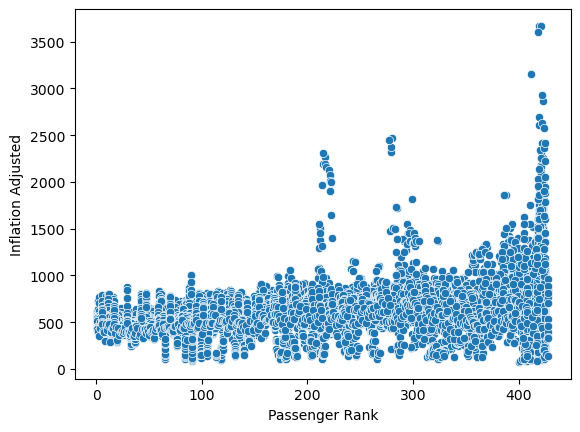

In [198]:
sns.scatterplot(x='Passenger Rank',y='Inflation Adjusted',data=airfare_plus_oil)
plt.show()

In [200]:
airfare_plus_oil['Inflation Adjusted'].corr(airfare_plus_oil['Passenger Rank'])

0.4252809867819982

In [191]:
lm = linear_model.LinearRegression()

In [201]:
y = airfare_plus_oil['Inflation Adjusted']
X = airfare_plus_oil[['Passenger Rank']]

In [202]:
%%time
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

b0 =  441.40088733177345
b1 =  [0.83431972]
CPU times: total: 0 ns
Wall time: 26.1 ms


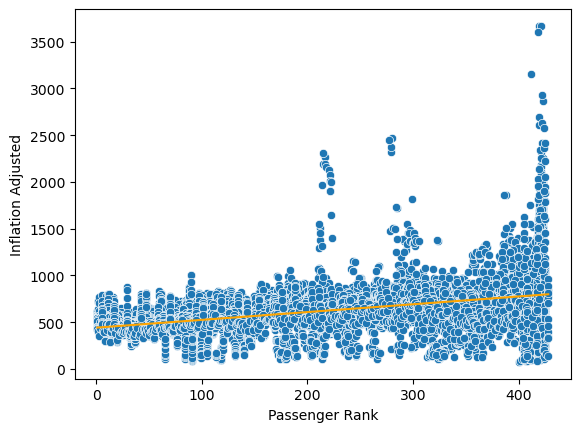

In [203]:
regression_line = lm.intercept_ + lm.coef_[0]*airfare_plus_oil['Passenger Rank']
plt.plot(airfare_plus_oil['Passenger Rank'], regression_line, c = 'orange')
sns.scatterplot(x='Passenger Rank',y='Inflation Adjusted',data=airfare_plus_oil)
plt.show()

C:\Users\harri\AppData\Local\Temp\ipykernel_12120\2240877853.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = airfare_plus_oil.corr()


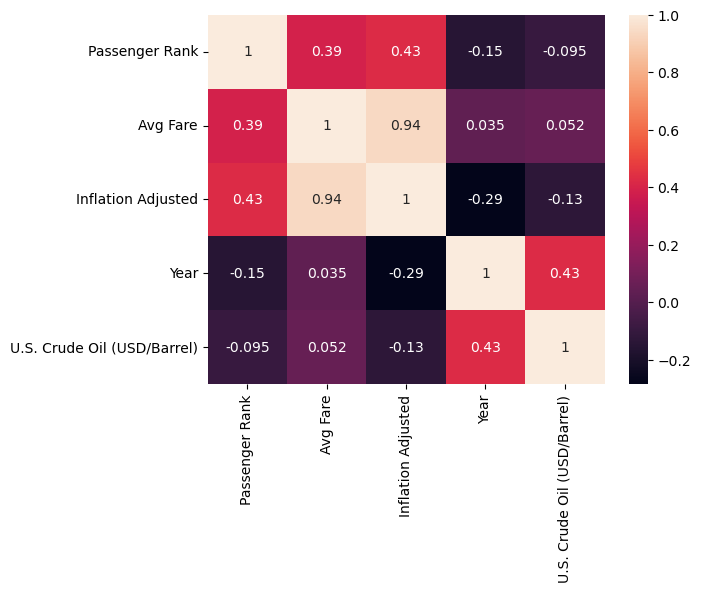

In [196]:
correlations_matrix = airfare_plus_oil.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [209]:
print("R2-score is ", lm.score(X,y))

y_pred = lm.predict(X)
print("mean squared error (MSE) is ", mean_squared_error(y_pred,y))
mean_squared_error(y_pred,y)

R2-score is  0.18086391771827015
mean squared error (MSE) is  56736.07520765878


56736.07520765878

In [257]:
airfare_numericals = airfare_plus_oil.drop(['Code','Name','Avg Fare','Year','City','State'], axis=1)

In [258]:
airfare_numericals

,Passenger Rank,Inflation Adjusted,U.S. Crude Oil (USD/Barrel)
0,1,610.60,21.84
1,2,717.24,21.84
2,3,754.64,21.84
3,4,598.25,21.84
4,5,765.51,21.84
...,...,...,...
10280,428,455.72,52.75
10281,428,135.95,52.75
10282,428,881.97,52.75
10283,428,809.46,52.75


In [279]:
airfare_numericals.to_csv('airfare_numericals.csv',index=False)

In [303]:
airfare_plus_oil[airfare_plus_oil['Inflation Adjusted'].gt(2000)].index[0]

522

In [305]:
high_airfares = airfare_plus_oil[airfare_plus_oil['Inflation Adjusted'] > 2000]

In [306]:
high_airfares

,Passenger Rank,Code,Name,City,State,Avg Fare,Inflation Adjusted,Year,U.S. Crude Oil (USD/Barrel)
522,419,KPC,Port Clarence CGS,Port Clarence,AK,1432.50,2613.32,1999,21.84
526,419,KTS,Brevig Mission Airport,Brevig Mission,AK,2011.00,3668.68,1999,21.84
608,419,TLA,Teller Airport,Teller,AK,1477.00,2694.50,1999,21.84
1730,423,IAN,Bob Baker Memorial,Kiana,AK,1315.00,2256.82,2001,37.53
1737,423,IRC,Circle City,Circle,AK,1672.00,2869.50,2001,37.53
2272,421,AKB,Atka Airport,Atka,AK,1292.50,2183.57,2002,31.42
2273,421,AKI,Akiak Airport,Akiak,AK,1231.33,2080.23,2002,31.42
2277,421,ALM,Alamogordo White Sands Regional,Alamogordo,NM,1374.50,2322.10,2002,31.42
2280,421,AUK,Alakanuk Airport,Alakanuk,AK,1186.00,2003.65,2002,31.42
2393,421,STG,St. George Island Airport,St. George Island,AK,1228.00,2074.60,2002,31.42


In [ ]:
# Airports with exceptionally high prices are located on islands or Alaska, 
# which is by far the largest state, with many places unreachable by road
# due to the treacherous navigation that would entail  

In [259]:
from sklearn import linear_model
y = airfare_numericals['U.S. Crude Oil (USD/Barrel)']
X3 = airfare_numericals.drop(['U.S. Crude Oil (USD/Barrel)'], axis=1)
lm3 = linear_model.LinearRegression()
lm3.fit(X3,y)
print(lm3.score(X3,y))
y_pred=lm3.predict(X3)
print(mean_squared_error(y_pred,y))

0.019941626380422517
723.3627241914237


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8228, 1)
(2057, 1)
(8228,)
(2057,)


In [262]:
X_train.head()

,Passenger Rank
3685,193
3184,209
7726,57
994,361
5980,133


In [263]:
y_train.head()

3685    62.41
3184    45.94
7726    99.97
994     39.57
5980    84.21
Name: U.S. Crude Oil (USD/Barrel), dtype: float64

In [264]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [274]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.009520896633253395

In [275]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.00612536953217413

In [276]:
y_test[:5]
plt.show()

In [268]:
y_test[:7]

7391     94.82
2968     40.15
1121     39.57
3314     45.94
6912    100.31
4634     70.01
1964     31.42
Name: U.S. Crude Oil (USD/Barrel), dtype: float64

In [269]:
y_test[:13]

7391     94.82
2968     40.15
1121     39.57
3314     45.94
6912    100.31
4634     70.01
1964     31.42
6447    102.65
5507     56.53
1626     37.53
6021     84.21
500      21.84
1183     39.57
Name: U.S. Crude Oil (USD/Barrel), dtype: float64

In [270]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

728.412973483377

In [271]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

26.989126949261937

In [272]:
y_test.mean()

61.12846864365581

In [281]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_boston
# boston = load_boston()
# X, y = load_boston(return_X_y=True)

airfare_numericals = pd.read_csv('airfare_numericals.csv')
X = airfare_numericals.drop(['Inflation Adjusted'], axis=1)
y = airfare_numericals['Inflation Adjusted']
display(X.head())
display(y.head())

,Passenger Rank,U.S. Crude Oil (USD/Barrel)
0,1,21.84
1,2,21.84
2,3,21.84
3,4,21.84
4,5,21.84


0    610.60
1    717.24
2    754.64
3    598.25
4    765.51
Name: Inflation Adjusted, dtype: float64

In [282]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5) # will give negative score in some folds, bacause the rows are ordered
scores

array([-0.05903189, -0.00529735, -0.22750605, -0.38434878, -0.95274091])

In [284]:
airfares = pd.concat([X, y], axis=1)
airfares.head()
airfares = airfares.sample(frac=1) # need to use randomized data - boston data set is ordered!
                                   # frac=0.2 means sample until you have 20% of the data, 
                                   # frac=1 means 100%
airfares.head()
type(airfares)
X_rand = airfares.drop(['Inflation Adjusted'], axis=1)
y_rand = airfares['Inflation Adjusted']

scores = cross_val_score(model, X_rand, y_rand, cv=5) 
scores

array([-0.05229201,  0.02043877, -0.02675533, -0.03533811, -0.1742947 ])

In [285]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
#and use X_val and y_val to validate the final model on
#added bonus: train_test_split does the randomization for us!
# no need to scale if we are only looking at DecisionTreeRegression
scores = cross_val_score(model, X_train, y_train, cv=5) 
scores

array([-0.08936367,  0.01797181, -0.01895006, -0.00652411, -0.03619551])

In [286]:
mean_score = scores.mean()
print(mean_score)

-0.026612310822082087


In [287]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

# new train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# now we do need to scale since we are looking at other models too. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.12744093338618087, 'Linear Regression': 0.18629154707084913, 'KNN': 0.11182505299042649}


In [288]:
list(zip(model_pipeline, model_names))

[(DecisionTreeRegressor(), 'Decision Tree Regressor'),
 (LinearRegression(), 'Linear Regression'),
 (KNeighborsRegressor(), 'KNN')]

In [289]:
val_scores = {}
for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train_scaled, y_train)
    val_scores[model_name] = model.score(X_val_scaled,y_val)
print(val_scores)

{'Decision Tree Regressor': -0.04024042914401171, 'Linear Regression': 0.20648776950591863, 'KNN': 0.14316451614018222}


In [307]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

y = airfares['Inflation Adjusted']
X = airfares.drop(['Inflation Adjusted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [308]:
X_num

,Passenger Rank,U.S. Crude Oil (USD/Barrel)
9430,21,61.28
288,289,21.84
2153,306,31.42
9127,149,47.75
8477,351,52.70
...,...,...
8168,42,52.70
6801,44,100.31
2013,166,31.42
7566,349,94.82


In [309]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(10285, 2)


,Passenger Rank,U.S. Crude Oil (USD/Barrel)
0,0.046838,0.396581
1,0.674473,0.000000
2,0.714286,0.096330
3,0.346604,0.260533
4,0.819672,0.310307
...,...,...
10280,0.096019,0.310307
10281,0.100703,0.789040
10282,0.386417,0.096330
10283,0.814988,0.733836


In [316]:
x_normalized

array([[0.04683841, 0.3965812 ],
       [0.67447307, 0.        ],
       [0.71428571, 0.09632981],
       ...,
       [0.38641686, 0.09632981],
       [0.81498829, 0.7338361 ],
       [0.11709602, 1.        ]])

In [310]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(10285, 2)


,Passenger Rank,U.S. Crude Oil (USD/Barrel)
0,-1.635578,-0.021470
1,0.362166,-1.473197
2,0.488888,-1.120572
3,-0.681432,-0.519489
4,0.824330,-0.337287
...,...,...
10280,-1.479038,-0.337287
10281,-1.464130,1.415165
10282,-0.554709,-1.120572
10283,0.809422,1.213086


In [311]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Passenger Rank,10285.0,6.563107e-17,1.000049,-1.784663,-0.875243,0.034178,0.951053,1.398309
U.S. Crude Oil (USD/Barrel),10285.0,-4.145120e-18,1.000049,-1.473197,-0.820582,-0.335447,0.822548,2.187407


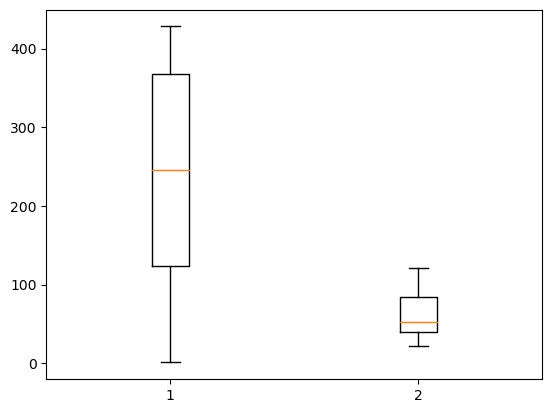

In [312]:
plt.boxplot(X_num)
plt.show()

In [315]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
x_num3 = X.select_dtypes(include = np.number)
x_num3 = pd.DataFrame(x_normalized, columns=X_num.columns)

(10285, 2)


In [327]:
x_num3.to_csv('x_num3.csv',index=False)

In [328]:
x_num3

,Passenger Rank,U.S. Crude Oil (USD/Barrel)
0,0.046838,0.396581
1,0.674473,0.000000
2,0.714286,0.096330
3,0.346604,0.260533
4,0.819672,0.310307
...,...,...
10280,0.096019,0.310307
10281,0.100703,0.789040
10282,0.386417,0.096330
10283,0.814988,0.733836


In [320]:
x_standardized

array([[-1.63557772, -0.02147028],
       [ 0.36216575, -1.47319681],
       [ 0.48888828, -1.12057156],
       ...,
       [-0.55470906, -1.12057156],
       [ 0.80942175,  1.21308621],
       [-1.41194972,  2.18740674]])

In [321]:
y = x_num3['U.S. Crude Oil (USD/Barrel)']
X3 = x_num3.drop(['U.S. Crude Oil (USD/Barrel)'], axis=1)
lm3 = linear_model.LinearRegression()
lm3.fit(X3,y)
print(lm3.score(X3,y))
y_pred=lm3.predict(X3)
print(mean_squared_error(y_pred,y))

0.00906944022453171
0.0739499404697542


In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8228, 2)
(2057, 2)
(8228,)
(2057,)


In [324]:
X_train.head()

,Passenger Rank,U.S. Crude Oil (USD/Barrel)
3262,287,45.94
328,329,21.84
2506,90,40.15
2206,359,31.42
1859,12,31.42


In [326]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [329]:
x_num3 = pd.read_csv('x_num3.csv')
features = x_num3.drop(['U.S. Crude Oil (USD/Barrel)'], axis=1)
labels = x_num3['U.S. Crude Oil (USD/Barrel)']
display(features.head())
display(labels.head())

,Passenger Rank
0,0.046838
1,0.674473
2,0.714286
3,0.346604
4,0.819672


0    0.396581
1    0.000000
2    0.096330
3    0.260533
4    0.310307
Name: U.S. Crude Oil (USD/Barrel), dtype: float64

In [ ]:
# goal would be to be to be able to enter a price of a barrel of oil as well as an airport rank and then produce an estimated airline ticket price